In [17]:
import numpy as np
from numpy import nan

#Pandas is used for data processing, reading the CSV File
import pandas as pd

#Matplotlib and Seaborn is used for plotting
import matplotlib.pyplot as plt
import seaborn as sns

#Remove any warnings
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import GridSearchCV
import joblib
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn import ensemble

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [18]:
df = pd.read_csv('data//shoeData.csv')

# Data Exploration

In [19]:
df.shape

(30, 8)

30 Rows and 8 Columns


In [20]:
df.columns

Index(['Shoe Name', 'Shoe Price', 'Shoe link', 'User', 'User Rating',
       'Review Header', 'Review Description', 'Date Published'],
      dtype='object')

Columns consist of
- "Shoe Name"
- "Shoe Price"
- "Shoe link"
- "User"
- "User Rating"
- "Review Header"
- "Review Description"
- "Date Published"


In [21]:
df.describe()

,User Rating
count,30.000000
mean,4.900000
std,0.402578
min,3.000000
25%,5.000000
50%,5.000000
75%,5.000000
max,5.000000


In [22]:
#We can preview the first 5 rows of the dataset
df.head()

,Shoe Name,Shoe Price,Shoe link,User,User Rating,Review Header,Review Description,Date Published
0,Jordan Retro 3,$200.00,https://www.footlocker.com/product/jordan-retr...,Meebabi,3,Retro 3,I'm liking the shoes and as many shoes that I ...,2023-10-04
1,Jordan Retro 3,$200.00,https://www.footlocker.com/product/jordan-retr...,Oye3,5,Best AJ3,I bought this shoe over a month ago and I'm so...,2023-10-03
2,Jordan Retro 3,$200.00,https://www.footlocker.com/product/jordan-retr...,TyMac,5,Thanks,Love the pair beautiful color… quick delivery…...,2023-09-28
3,Jordan Retro 3,$200.00,https://www.footlocker.com/product/jordan-retr...,Jaheem,5,Excellent,I bought a month ago and they are wonderful. I...,2023-09-12
4,Jordan Retro 3,$200.00,https://www.footlocker.com/product/jordan-retr...,D8nger,5,Dope,Great shoe. Brought for myself and wife. She...,2023-09-11


# Data Visualization

Text(0, 0.5, 'Frequency')

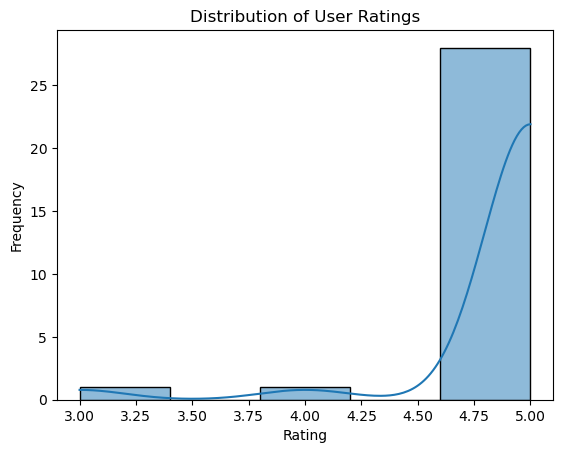

In [23]:
sns.histplot(df['User Rating'], bins=5, kde=True)
plt.title('Distribution of User Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')

Histogram of User Ratings

- **High Rating Bias:** A significant majority of the ratings are clustered around the maximum score of 5.0. This suggests that most users are very satisfied with their purchases or the products they're reviewing.

- **Sparse Low Ratings:** There are minimal ratings in the lower range (from 3.0 to about 4.25), indicating that negative feedback or dissatisfaction among users is quite rare for the products in the dataset.

- **Skewness:** The distribution is left-skewed, implying that there are fewer low ratings compared to high ratings.

- **Potential Ceiling Effect:** Since a significant portion of ratings is at the maximum value (5.0), it might be indicative of a ceiling effect, where users might want to give a rating slightly higher than 5.0 if it were possible.

- **Peak at 5.0:** The sharp peak at the 5.0 rating suggests either an overwhelmingly positive reception of the products or a potential bias in the collection or reporting of ratings. Some factors to consider could be:

Users may only be motivated to leave a review if they had an exceptionally good experience.
There could be incentives for leaving positive reviews.
Negative reviews might be filtered or not displayed.
General Satisfaction: If we assume the data is representative and without external biases, it conveys that users are generally very satisfied with the products they're reviewing.

In conclusion, while the histogram provides a positive picture regarding user satisfaction, it's essential to consider external factors that might influence such a distribution and ensure that it accurately represents the broader customer base.

Text(0.5, 0, 'Number of Reviews')

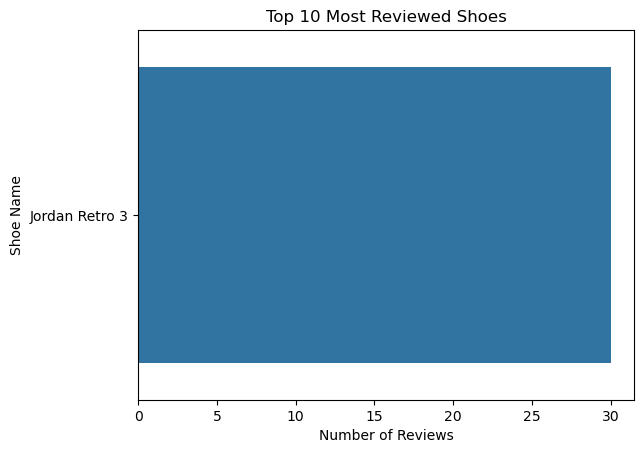

In [24]:
sns.countplot(y='Shoe Name', data=df, order=df['Shoe Name'].value_counts().iloc[:10].index)
plt.title('Top 10 Most Reviewed Shoes')
plt.xlabel('Number of Reviews')

**Placeholder, currently only have Jordan Retro 3***

Text(0, 0.5, 'Frequency')

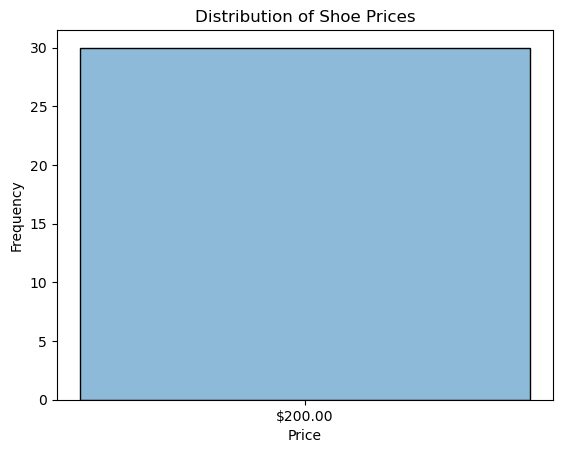

In [25]:
sns.histplot(df['Shoe Price'], kde=True)
plt.title('Distribution of Shoe Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')

Distribution of Shoe Prices

*****Relationships*****

Text(0.5, 1.0, 'Shoe Price Distribution by User Rating')

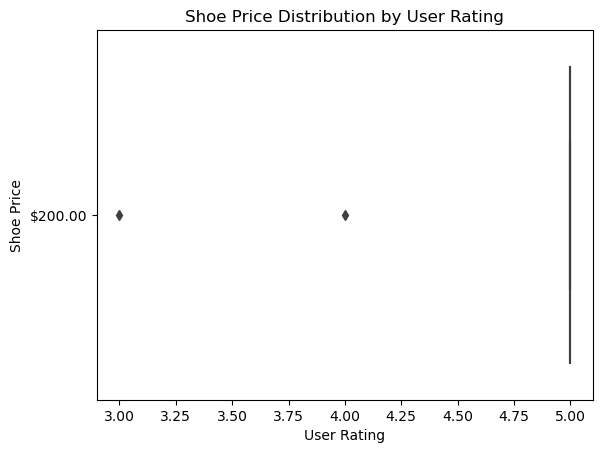

In [26]:
sns.boxplot(x='User Rating', y='Shoe Price', data=df)
plt.title('Shoe Price Distribution by User Rating')

Box plot of Shoe Prices vs User Ratings (to see if higher-priced shoes get better ratings)

Text(0, 0.5, 'Number of Reviews')

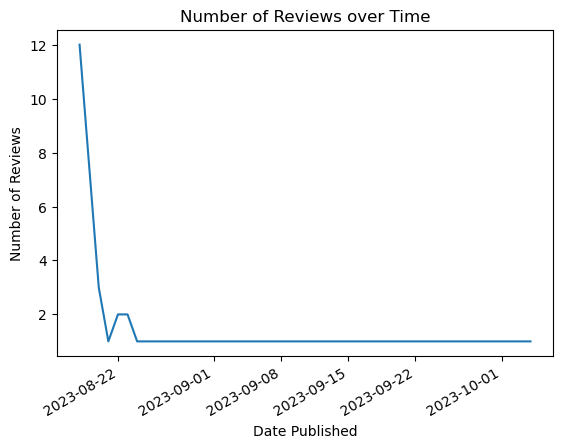

In [27]:
# First, convert 'Date Published' to datetime type
df['Date Published'] = pd.to_datetime(df['Date Published'])

# Group by date and count reviews
reviews_over_time = df.groupby('Date Published').size()

# Plot
reviews_over_time.plot()
plt.title('Number of Reviews over Time')
plt.ylabel('Number of Reviews')

Number of Reviews over Time (to see if the number of reviews has been increasing or decreasing):

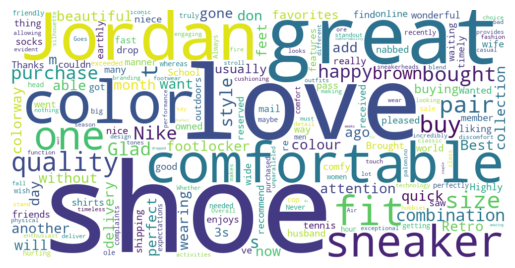

In [28]:
from wordcloud import WordCloud

# Combine all review descriptions into one text
text = " ".join(review for review in df['Review Description'].dropna())

# Generate the word cloud
wordcloud = WordCloud(width=1000, height=500, background_color="white").generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Data Cleaning

### Handling Missing Data
Check for any missing values:

In [29]:
missing_values = df.isnull().sum()
print(missing_values)

Shoe Name             0
Shoe Price            0
Shoe link             0
User                  0
User Rating           0
Review Header         0
Review Description    0
Date Published        0
dtype: int64


The data does not have any missing values

### Removing Duplicates
Check and remove any duplicate rows:

In [30]:
df.drop_duplicates

<bound method DataFrame.drop_duplicates of          Shoe Name Shoe Price  \
0   Jordan Retro 3    $200.00   
1   Jordan Retro 3    $200.00   
2   Jordan Retro 3    $200.00   
3   Jordan Retro 3    $200.00   
4   Jordan Retro 3    $200.00   
5   Jordan Retro 3    $200.00   
6   Jordan Retro 3    $200.00   
7   Jordan Retro 3    $200.00   
8   Jordan Retro 3    $200.00   
9   Jordan Retro 3    $200.00   
10  Jordan Retro 3    $200.00   
11  Jordan Retro 3    $200.00   
12  Jordan Retro 3    $200.00   
13  Jordan Retro 3    $200.00   
14  Jordan Retro 3    $200.00   
15  Jordan Retro 3    $200.00   
16  Jordan Retro 3    $200.00   
17  Jordan Retro 3    $200.00   
18  Jordan Retro 3    $200.00   
19  Jordan Retro 3    $200.00   
20  Jordan Retro 3    $200.00   
21  Jordan Retro 3    $200.00   
22  Jordan Retro 3    $200.00   
23  Jordan Retro 3    $200.00   
24  Jordan Retro 3    $200.00   
25  Jordan Retro 3    $200.00   
26  Jordan Retro 3    $200.00   
27  Jordan Retro 3    $200.00   


In [31]:
df.drop_duplicates(inplace=True)

### Handling Outliers
For columns like 'Shoe Price' and 'User Rating', visually inspect for outliers using box plots:

In [34]:
sns.boxplot(x=df['Shoe Price'])

TypeError: Horizontal orientation requires numeric `x` variable.